# RICHARD AYISI
# C2003977
# Machine learning prediction of a Breast Cancer Metabric data


### This data is about breast cancer, taken from kaggle. The data contains details of patients who have breast cancer, whether they are still living or not and also very valuable lab analysis data. I am using this data with the help of machine learning algorithms create a model that will predict if a patient is still living or not. I have applied logistic,Naive bayes,decisionTreeClassifier and RadomForestClassifier in this work.

In [1]:
# Importing the needed libraries 

In [2]:
## importing data
import pandas as pd
import numpy as np

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

import warnings 
warnings.filterwarnings(action='ignore')
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score


In [3]:
# Importing the data
URL='C:\\Users\\Test\\OneDrive - Teesside University\\Breast Cancer METABRIC.csv'
data=pd.read_csv(URL,na_values="?")
data.head(5)

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [4]:
# dropping duplicate values in the data
data.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,70.05,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,...,NaN,NaN,NaN,4.93,Recurred,Female,NaN,27.0,1.0,NaN
2505,MTS-T2429,63.60,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,...,NaN,NaN,NaN,16.18,Recurred,Female,NaN,28.0,2.0,NaN
2506,MTS-T2430,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN
2507,MTS-T2431,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN


In [5]:
data.shape

(2509, 34)

In [6]:
# the data has 2509 attributes and 34 features

In [7]:
data.columns

Index(['Patient ID', 'Age at Diagnosis', 'Type of Breast Surgery',
       'Cancer Type', 'Cancer Type Detailed', 'Cellularity', 'Chemotherapy',
       'Pam50 + Claudin-low subtype', 'Cohort', 'ER status measured by IHC',
       'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Sex', '3-Gene classifier subtype', 'Tumor Size', 'Tumor Stage',
       'Patient's Vital Status'],
      dtype='object')

In [8]:
data.isna().sum()

Patient ID                          0
Age at Diagnosis                   11
Type of Breast Surgery            554
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                             11
ER status measured by IHC          83
ER Status                          40
Neoplasm Histologic Grade         121
HER2 status measured by SNP6      529
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive     266
Mutation Count                    152
Nottingham prognostic index       222
Oncotree Code                       0
Overall Survival (Months)         528
Overall Survival Status           528
PR Status                         529
Radio Therap

In [9]:
# dropping certain features 
# The features have too many empty spaces
data=data.drop(["Patient ID",'3-Gene classifier subtype','HER2 status measured by SNP6','ER status measured by IHC' ],axis=1)
data=data.drop(['Cancer Type','Overall Survival (Months)' ],axis=1)
data=data.drop(['Tumor Stage','Primary Tumor Laterality',"Patient's Vital Status" ],axis=1)

In [10]:
data.shape

(2509, 25)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age at Diagnosis                2498 non-null   float64
 1   Type of Breast Surgery          1955 non-null   object 
 2   Cancer Type Detailed            2509 non-null   object 
 3   Cellularity                     1917 non-null   object 
 4   Chemotherapy                    1980 non-null   object 
 5   Pam50 + Claudin-low subtype     1980 non-null   object 
 6   Cohort                          2498 non-null   float64
 7   ER Status                       2469 non-null   object 
 8   Neoplasm Histologic Grade       2388 non-null   float64
 9   HER2 Status                     1980 non-null   object 
 10  Tumor Other Histologic Subtype  2374 non-null   object 
 11  Hormone Therapy                 1980 non-null   object 
 12  Inferred Menopausal State       19

In [12]:
data.isna().sum()

Age at Diagnosis                   11
Type of Breast Surgery            554
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                             11
ER Status                          40
Neoplasm Histologic Grade         121
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Lymph nodes examined positive     266
Mutation Count                    152
Nottingham prognostic index       222
Oncotree Code                       0
Overall Survival Status           528
PR Status                         529
Radio Therapy                     529
Relapse Free Status (Months)      121
Relapse Free Status                21
Sex                                 0
Tumor Size                        149
dtype: int64

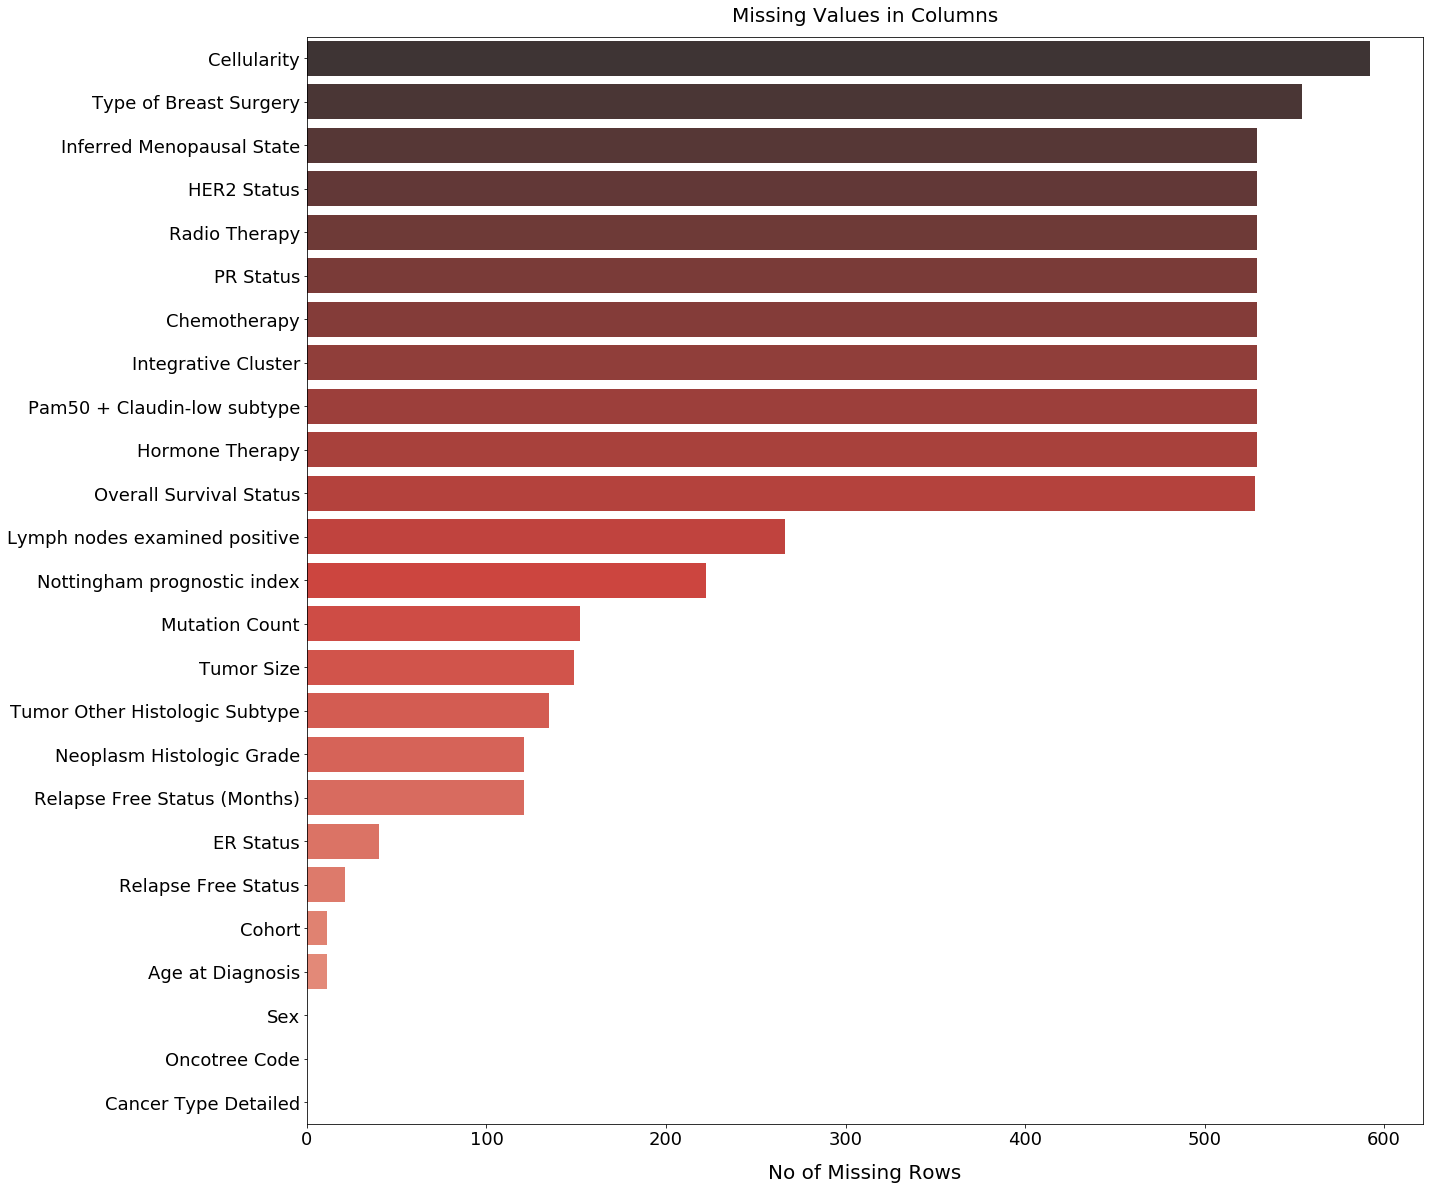

In [13]:
# checking the amount of data missing from each feature
fig = plt.figure(figsize=(20, 20))

sns.barplot(x=data.isnull().sum().sort_values(ascending=False).values,
            y=data.isnull().sum().sort_values(ascending=False).index,
            palette='Reds_d')

plt.xlabel('No of Missing Rows', size=20, labelpad=15)
plt.ylabel('')
plt.tick_params(axis='x', labelsize=18)
plt.tick_params(axis='y', labelsize=18)
plt.title('Missing Values in Columns', size=20, pad=15)

plt.show()

#### Age of diagnosis, relapse free status(months), nottingham prognostic index,tumor size,cohort,relapse free status,ER status,Neoplasm Histologic Grade and Tumor Other  Histologic Subtype had the fewest Null values and so i decided to fill those by using means for the integer values and interpolation for the categorical values. The rest of the features with null values had the same spaces of null values through and so I decided to drop those values.

In [14]:
data['Age at Diagnosis'].fillna(data['Age at Diagnosis'].mean(), inplace=True)
data['Relapse Free Status (Months)'].fillna(data['Relapse Free Status (Months)'].mean(), inplace=True)
data['Nottingham prognostic index'].fillna(data['Nottingham prognostic index'].mean(), inplace=True)
data['Tumor Size'].fillna(data['Tumor Size'].mean(), inplace=True)

In [15]:
data['Cohort'].interpolate(inplace=True)
data['Relapse Free Status'].interpolate(inplace=True)
data['ER Status'].interpolate(inplace=True)
data['Neoplasm Histologic Grade'].interpolate(inplace=True)
data['Tumor Other Histologic Subtype'].interpolate(inplace=True)

In [16]:
data.isna().sum()

Age at Diagnosis                    0
Type of Breast Surgery            554
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                              0
ER Status                          40
Neoplasm Histologic Grade           0
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Lymph nodes examined positive     266
Mutation Count                    152
Nottingham prognostic index         0
Oncotree Code                       0
Overall Survival Status           528
PR Status                         529
Radio Therapy                     529
Relapse Free Status (Months)        0
Relapse Free Status                21
Sex                                 0
Tumor Size                          0
dtype: int64

In [17]:
datafinal=data.dropna()

In [18]:
datafinal['Integrative Cluster'] = datafinal['Integrative Cluster'].replace(['4ER+'], '4')

In [19]:
datafinal['Overall Survival Status'].unique()

array(['Living', 'Deceased'], dtype=object)

In [20]:
#After sorting the null values we end up with a cleaned data
datafinal.isna().sum()

Age at Diagnosis                  0
Type of Breast Surgery            0
Cancer Type Detailed              0
Cellularity                       0
Chemotherapy                      0
Pam50 + Claudin-low subtype       0
Cohort                            0
ER Status                         0
Neoplasm Histologic Grade         0
HER2 Status                       0
Tumor Other Histologic Subtype    0
Hormone Therapy                   0
Inferred Menopausal State         0
Integrative Cluster               0
Lymph nodes examined positive     0
Mutation Count                    0
Nottingham prognostic index       0
Oncotree Code                     0
Overall Survival Status           0
PR Status                         0
Radio Therapy                     0
Relapse Free Status (Months)      0
Relapse Free Status               0
Sex                               0
Tumor Size                        0
dtype: int64

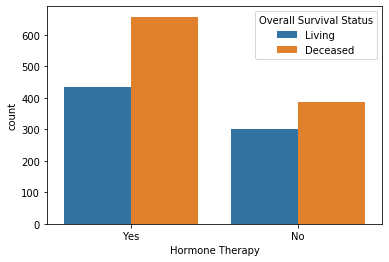

In [21]:
#  most Patients who did get hormome therapy died than those who survived, the same can be said for those who didnt 
# get hormone therapy
w=0.6

sns.countplot(x='Hormone Therapy',data=datafinal, hue='Overall Survival Status')

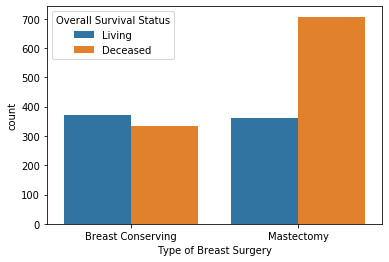

In [22]:
# More patients who undertook mastectomy died than those who did go through Breast conserving
# Patients who survived after the two procedure is almost the same
w=0.6

sns.countplot(x='Type of Breast Surgery',data=datafinal, hue='Overall Survival Status')

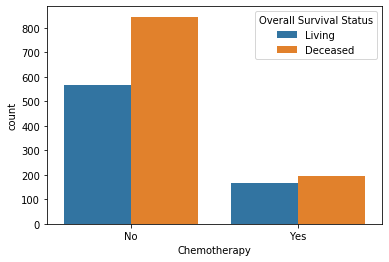

In [23]:
# More patients who did not go through chemotherapy died compared to those who did
# The same can be said for patients still living
w=0.6

sns.countplot(x='Chemotherapy',data=datafinal, hue='Overall Survival Status')

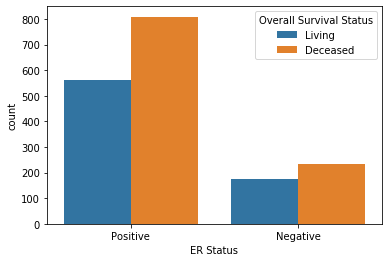

In [24]:
w=0.6

sns.countplot(x='ER Status',data=datafinal, hue='Overall Survival Status')

In [25]:
# now data is ready for working, having gotten rid of all missing values
# The data has a number of features with categorical data
# Used labelEncoder to encode them 
# chose labelencoder over one hot encoder because onehot encoder adds too many columns to the data
#Also the other encoding types will rank the values introducing biasness in the data

In [26]:
from sklearn.preprocessing import LabelEncoder

ord_enc = LabelEncoder()
datafinal["Type of Breast Surgery"] = ord_enc.fit_transform(datafinal[["Type of Breast Surgery"]])

datafinal["Cancer Type Detailed"] = ord_enc.fit_transform(datafinal[["Cancer Type Detailed"]])
datafinal["Cellularity"] = ord_enc.fit_transform(datafinal[["Cellularity"]])
datafinal["Chemotherapy"] = ord_enc.fit_transform(datafinal[["Chemotherapy"]])
datafinal["Pam50 + Claudin-low subtype"] = ord_enc.fit_transform(datafinal[["Pam50 + Claudin-low subtype"]])

datafinal["ER Status"] = ord_enc.fit_transform(datafinal[["ER Status"]])

datafinal["HER2 Status"] = ord_enc.fit_transform(datafinal[["HER2 Status"]])
datafinal["Tumor Other Histologic Subtype"] = ord_enc.fit_transform(datafinal[["Tumor Other Histologic Subtype"]])
datafinal["Hormone Therapy"] = ord_enc.fit_transform(datafinal[["Hormone Therapy"]])
datafinal["Inferred Menopausal State"] = ord_enc.fit_transform(datafinal[["Inferred Menopausal State"]])
datafinal["Integrative Cluster"] = ord_enc.fit_transform(datafinal[["Integrative Cluster"]])

datafinal["Oncotree Code"] = ord_enc.fit_transform(datafinal[["Oncotree Code"]])
datafinal["Overall Survival Status"] = ord_enc.fit_transform(datafinal[["Overall Survival Status"]])
datafinal["PR Status"] = ord_enc.fit_transform(datafinal[["PR Status"]])
datafinal["Radio Therapy"] = ord_enc.fit_transform(datafinal[["Radio Therapy"]])
datafinal["Relapse Free Status"] = ord_enc.fit_transform(datafinal[["Relapse Free Status"]])
datafinal["Sex"] = ord_enc.fit_transform(datafinal[["Sex"]])

In [27]:
datafinal.head(5)

,Age at Diagnosis,Type of Breast Surgery,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER Status,Neoplasm Histologic Grade,HER2 Status,...,Mutation Count,Nottingham prognostic index,Oncotree Code,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,Tumor Size
1,43.19,0,1,0,0,2,1.0,1,3.0,0,...,2.0,4.020,1,1,1,1,83.52,0,0,10.0
2,48.87,1,1,0,1,3,1.0,1,2.0,0,...,2.0,4.030,1,0,1,0,151.28,1,0,15.0
3,47.68,1,4,2,1,3,1.0,1,2.0,0,...,1.0,4.050,5,1,1,1,162.76,0,0,25.0
4,76.97,1,4,0,1,3,1.0,1,3.0,0,...,2.0,6.080,5,0,1,1,18.55,1,0,40.0
5,78.77,1,1,2,0,3,1.0,1,3.0,0,...,4.0,4.062,1,0,1,1,2.89,1,0,31.0


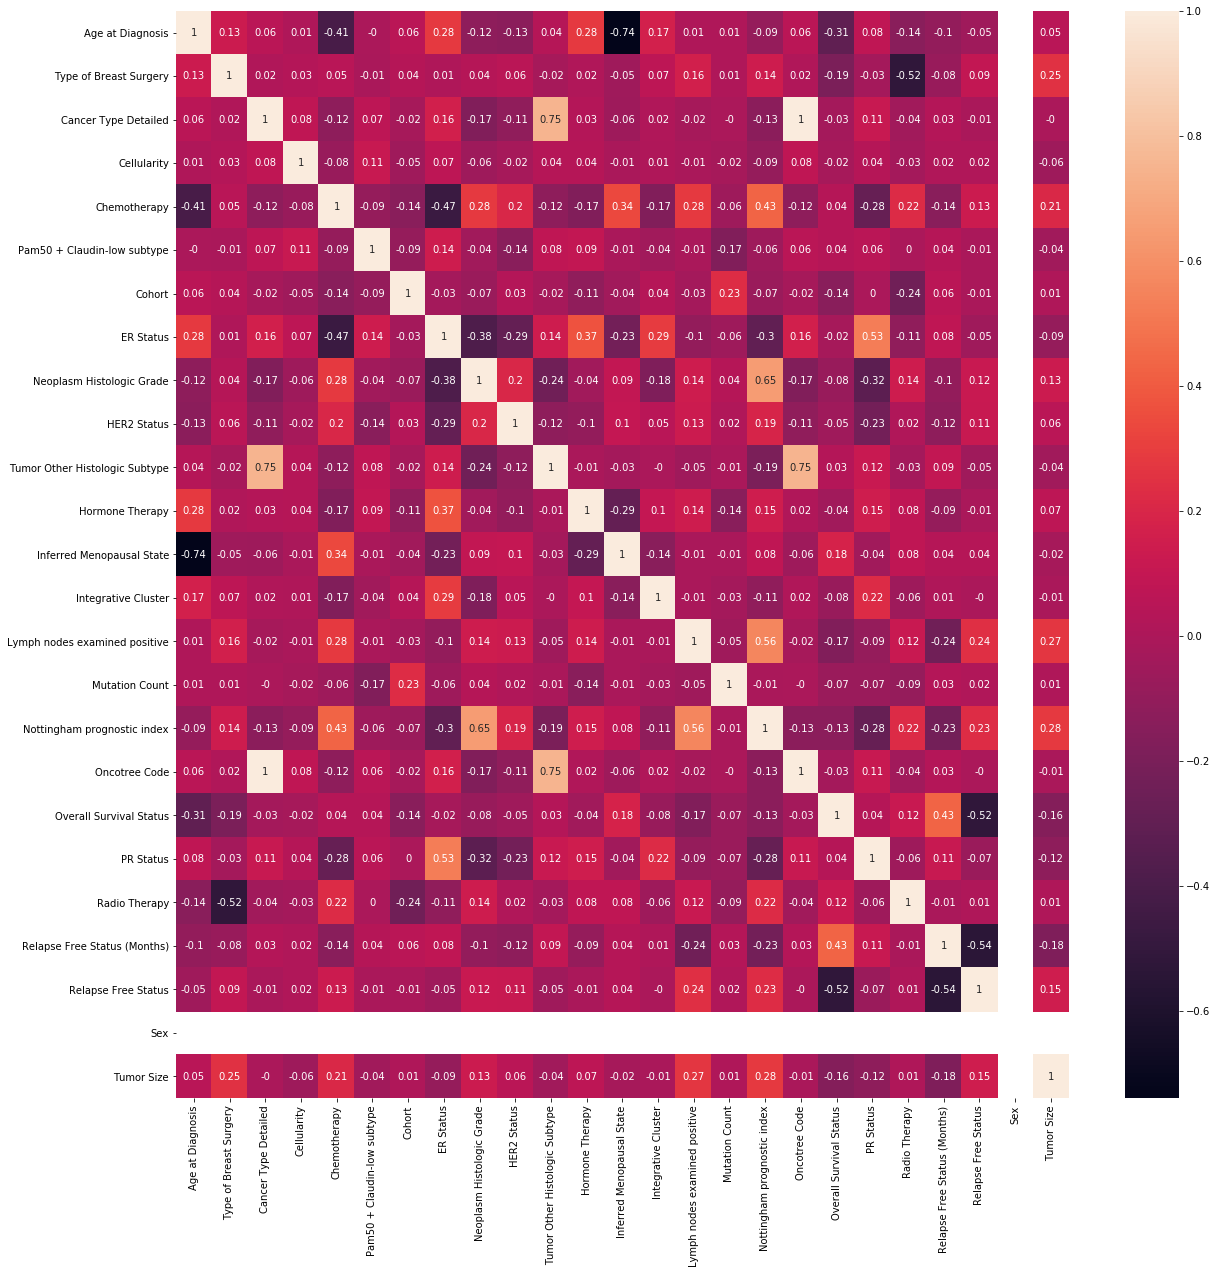

In [28]:
# After encoding it is important to check for collineraity amongst the features
cor = datafinal.corr().round(2)

plt.figure(figsize=(20,20))
sns.heatmap(cor, xticklabels=cor.columns,annot=True,yticklabels=cor.columns)

In [29]:
# There is a strong relationship between Oncotree and Tumor Other Histologic Subtype 
# There is also a strong relationship between Cancer Type detailed and Tumor Other Histologic Subtype
#There is a strong relationship between Nottingham Prognostic index and Neoplasm Hitologic Grade
# As a result I am dropping Tumor Other Histologic Subtype and Neoplasm Histologic Grade
# I am also dropping sex since the data consist of only females

In [30]:
datafinal=datafinal.drop(['Sex','Neoplasm Histologic Grade','Tumor Other Histologic Subtype' ],axis=1)

### Quickly overviewing the features

<Figure size 432x288 with 0 Axes>

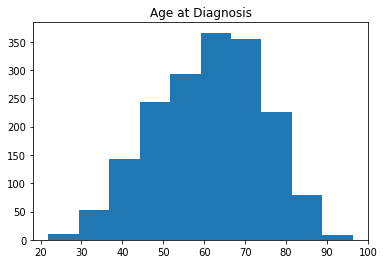

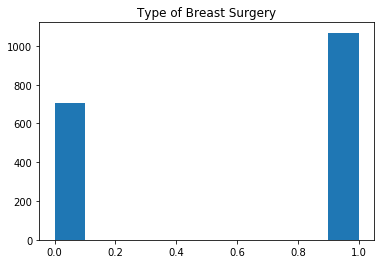

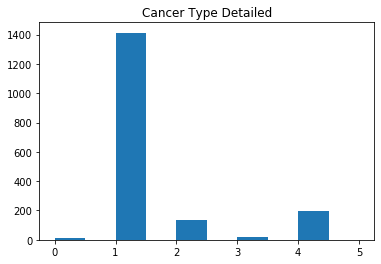

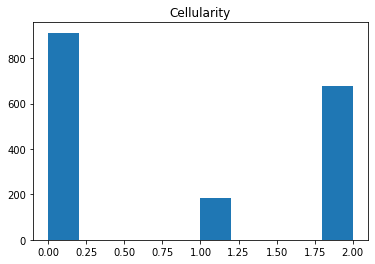

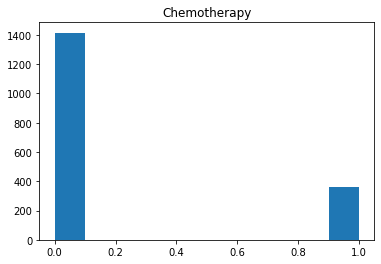

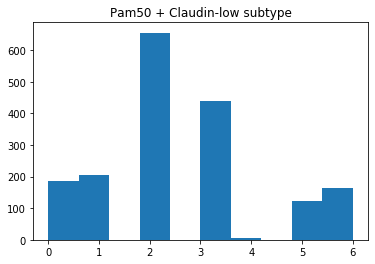

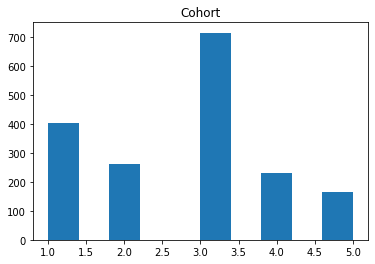

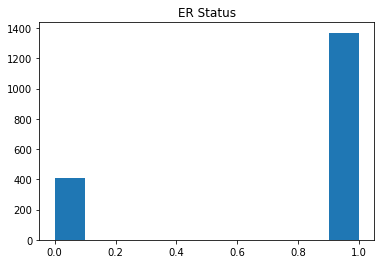

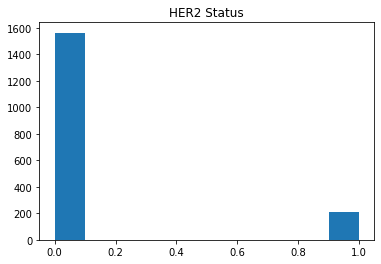

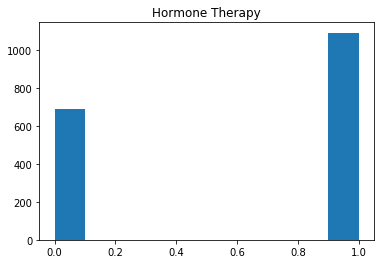

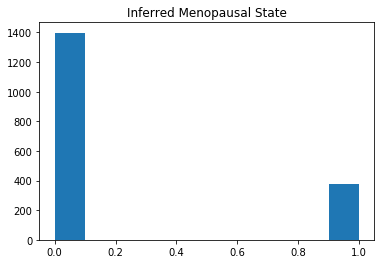

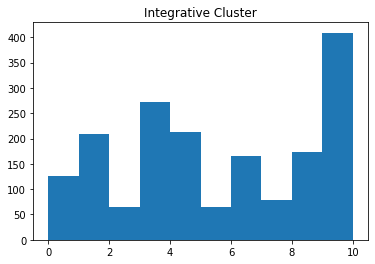

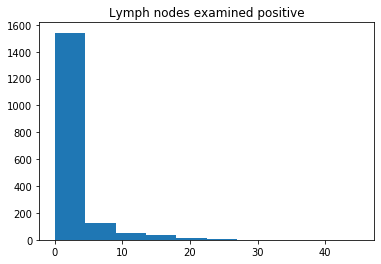

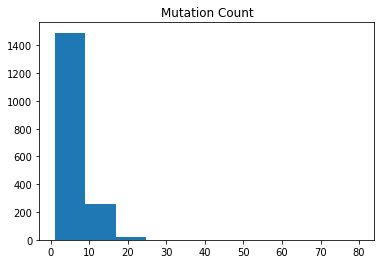

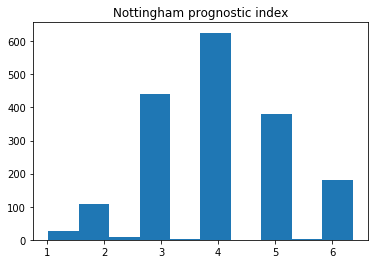

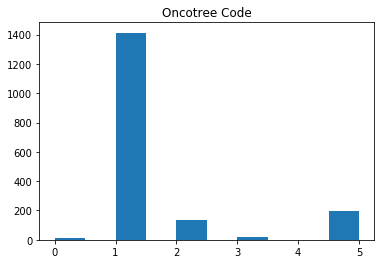

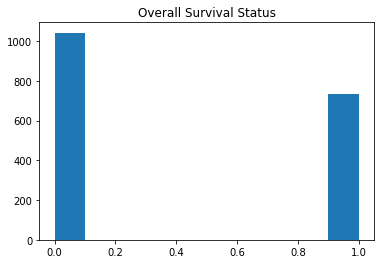

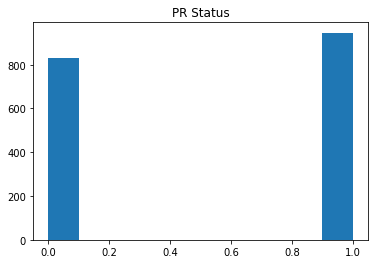

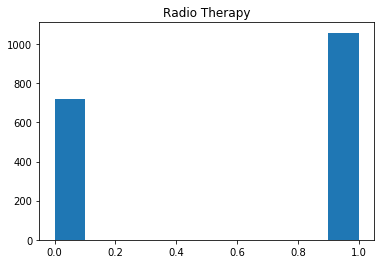

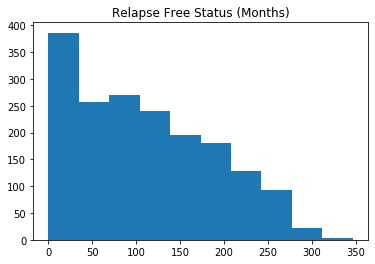

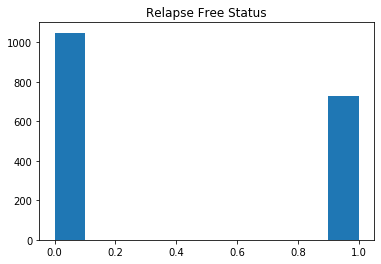

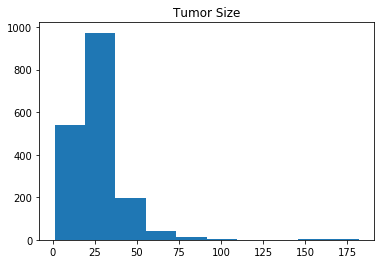

In [31]:
# Histogram of all features
# there target variable shows a ralatively balanced data
for i,column in enumerate(datafinal.columns): 
    plt.figure(i)
    datafinal.hist(column=column,grid=False)

In [32]:
# Scaling to normalize data, this helps to reduce biasness, and improve on accuracy
datafinal_copy = datafinal.copy()
RC = RobustScaler()
datafinal_rc=RC.fit_transform(datafinal_copy)
datafinal_rc=pd.DataFrame(datafinal_rc,columns=datafinal.columns)

In [33]:
# Dividing data into the training and testing data
# the training data is used to train the model while the testing data is used to test the model 

In [34]:
X= datafinal_rc.drop(['Overall Survival Status'], axis=1)

y = datafinal_rc['Overall Survival Status']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
X_train.shape, X_test.shape

((1420, 21), (356, 21))

In [37]:
X_train.head(5)

,Age at Diagnosis,Type of Breast Surgery,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER Status,HER2 Status,Hormone Therapy,...,Integrative Cluster,Lymph nodes examined positive,Mutation Count,Nottingham prognostic index,Oncotree Code,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Tumor Size
1646,0.214893,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.6,0.0,0.25,-1.016064,0.0,0.0,-1.0,0.261567,0.0,-1.083333
565,-0.189766,-1.0,0.0,0.0,0.0,-2.0,-1.0,-1.0,0.0,0.0,...,-0.8,0.0,1.00,-0.009036,0.0,-1.0,0.0,0.328916,0.0,-0.833333
1340,0.156786,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.2,0.0,1.75,0.004016,0.0,0.0,-1.0,-0.647524,0.0,0.250000
376,0.477686,0.0,0.0,0.0,0.0,4.0,-2.0,0.0,0.0,0.0,...,-0.2,2.5,-0.75,0.510040,0.0,0.0,0.0,-0.070371,0.0,0.583333
381,0.419579,-1.0,1.0,1.0,0.0,-1.0,-2.0,-1.0,0.0,0.0,...,1.0,1.0,4.25,0.508032,1.0,-1.0,0.0,-0.594280,1.0,0.416667


## NAIVE BAYES

In [38]:
# training a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [39]:
y_pred = gnb.predict(X_test)


In [40]:
from sklearn.metrics import accuracy_score

print('Model text accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model text accuracy score: 0.7697


In [41]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([1., 1., 0., ..., 0., 1., 1.])

In [42]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7754


In [43]:
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7754
Test set score: 0.7697


In [44]:
# check class distribution in test set

y_test.value_counts()

0.0    209
1.0    147
Name: Overall Survival Status, dtype: int64

In [45]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[160  49]
 [ 33 114]]

True Positives(TP) =  160

True Negatives(TN) =  114

False Positives(FP) =  49

False Negatives(FN) =  33


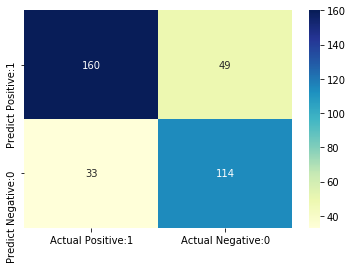

In [46]:
# Visuallising the comfusing matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.77      0.80       209
         1.0       0.70      0.78      0.74       147

    accuracy                           0.77       356
   macro avg       0.76      0.77      0.77       356
weighted avg       0.78      0.77      0.77       356



In [48]:

classification_accuracy = (cm[0,0] + cm[1,1]) / float(cm[0,0] + cm[1,1] + cm[0,1] +cm[1,0])

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7697


In [49]:
# Performing cross validation to see if there will be a better  accuracy

from sklearn.model_selection import cross_val_score

# Create a Naive Bayes model
#nb = MultinomialNB()

# Perform 10-fold cross-validation
scores = cross_val_score(gnb, X_train, y_train, cv=10)

# Print the mean and standard deviation of the cross-validation scores
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Mean accuracy: 0.7654929577464789
Standard deviation: 0.029044493841269392


In [50]:
roc_auc_score(y_test, y_pred)

0.7705302216580412

## LOGISTIC REGRESSION

In [51]:
from sklearn.linear_model import LogisticRegression
lgR=LogisticRegression(random_state=0).fit(X_train,y_train)

In [52]:
y_pred1=lgR.predict(X_test)

In [53]:
cm1=confusion_matrix(y_test,y_pred1)
print('confusion matrix for the logistic regression is: ', cm1)

confusion matrix for the logistic regression is:  [[178  31]
 [ 40 107]]


In [54]:
print('The test accuracy score for the logistic regression is: ',accuracy_score(y_test,y_pred1))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train,lgR.predict(X_train))))

The test accuracy score for the logistic regression is:  0.800561797752809
Training-set accuracy score: 0.8162


In [55]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

         0.0       0.82      0.85      0.83       209
         1.0       0.78      0.73      0.75       147

    accuracy                           0.80       356
   macro avg       0.80      0.79      0.79       356
weighted avg       0.80      0.80      0.80       356



In [56]:
from sklearn.model_selection import GridSearchCV
#defining a grid hyperparameters to search over
param_grid = {'penalty' : ['l1','l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100]}

#performing grid search cross-validation
grid_search = GridSearchCV(lgR, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [57]:
print('Best hyperparameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best hyperparameters: {'C': 10, 'penalty': 'l2'}
Best score: 0.8070422535211268


## Decision Trees Classifier

In [58]:
DTC=DecisionTreeClassifier(max_depth=3)
DTC.fit(X_train,y_train)
y_pred2=DTC.predict(X_test)

In [59]:
print('Decision Tree test accuracy score is:', accuracy_score(y_test,y_pred2))
print('Decision Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train,DTC.predict(X_train))))

Decision Tree test accuracy score is: 0.7921348314606742
Decision Training-set accuracy score: 0.8162


In [60]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83       209
         1.0       0.79      0.67      0.73       147

    accuracy                           0.79       356
   macro avg       0.79      0.77      0.78       356
weighted avg       0.79      0.79      0.79       356



In [61]:
print('The confusion matrix for the decision tree is:', confusion_matrix(y_test,y_pred2))

The confusion matrix for the decision tree is: [[183  26]
 [ 48  99]]


In [62]:
# To check performance I performed a hyperparameter tunning
# I first define the parameters to tune, max_deapth controls the maximum depth of the decison tree.
# The min_samples_split on the other hand helps to control the minimum samples that is required to split the internal node
# Finally the min_samples_leaf also controls the minimum number of samples that is required to be at a leaf


param_grid={
    'max_depth': [2,4,6,8,10],
    'min_samples_split':[2,4,6,8,10],
    'min_samples_leaf': [1,2,3,4,5]
}

In [63]:
DTC2=DecisionTreeClassifier(criterion='entropy',random_state=0)
grid_search = GridSearchCV(DTC2, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None, max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
      

In [64]:
DTC2 = grid_search.best_estimator_
y_pred3 = DTC2.predict(X_test)

In [65]:
accuracy = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy}")

Accuracy: 0.800561797752809


In [66]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

         0.0       0.79      0.89      0.84       209
         1.0       0.81      0.67      0.74       147

    accuracy                           0.80       356
   macro avg       0.80      0.78      0.79       356
weighted avg       0.80      0.80      0.80       356



## RANDOM FOREST CLASSIFIER

In [67]:
RFC=RandomForestClassifier(criterion='entropy',n_estimators=50,max_depth=2,random_state=42)
RFC.fit(X_train,y_train)
y_pred4= RFC.predict(X_test)

print('The confusion matrix for the Random Forest is:', confusion_matrix(y_test,y_pred4))
print('The testing accuracy score for the Random forest is:', accuracy_score(y_test,y_pred4))
print('The training accuracy score for the Random forest is:', accuracy_score(y_train,RFC.predict(X_train)))

The confusion matrix for the Random Forest is: [[193  16]
 [ 64  83]]
The testing accuracy score for the Random forest is: 0.7752808988764045
The training accuracy score for the Random forest is: 0.7985915492957747


In [68]:
roc_auc_score(y_test, y_pred4)

0.7440354132083455

In [69]:
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

         0.0       0.75      0.92      0.83       209
         1.0       0.84      0.56      0.67       147

    accuracy                           0.78       356
   macro avg       0.79      0.74      0.75       356
weighted avg       0.79      0.78      0.76       356



In [70]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RFC, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)
Best_parameters=gridF.best_params_
print(Best_parameters)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 22.8min finished


{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [71]:
# After searching the best parameters, the parameters provided resulted in an accuracy that was worse off, so 
# I maually worked through to get a better accuracy
RFC2=RandomForestClassifier(criterion='entropy',random_state=42,max_depth=8,n_estimators=100,min_samples_split=2,min_samples_leaf=1)
RFC2.fit(X_train,y_train)
y_pred5= RFC2.predict(X_test)
print('The confusion matrix for the Random Forest is:', confusion_matrix(y_test,y_pred5))
print('The accuracy score for the Random forest is:', accuracy_score(y_test,y_pred5))
print('The training accuracy score for the Random forest is:', accuracy_score(y_train,RFC2.predict(X_train)))

The confusion matrix for the Random Forest is: [[182  27]
 [ 43 104]]
The accuracy score for the Random forest is: 0.8033707865168539
The training accuracy score for the Random forest is: 0.9176056338028169


In [72]:
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       209
         1.0       0.79      0.71      0.75       147

    accuracy                           0.80       356
   macro avg       0.80      0.79      0.79       356
weighted avg       0.80      0.80      0.80       356



In [73]:
#adjusting the values of the hyperparameters to see if the test score and training score will be closer to reduce overfitting
RFC2=RandomForestClassifier(criterion='entropy',random_state=42,max_depth=5,n_estimators=500,min_samples_split=15,min_samples_leaf=15)
RFC2.fit(X_train,y_train)
y_pred5= RFC2.predict(X_test)
print('The confusion matrix for the Random Forest is:', confusion_matrix(y_test,y_pred5))
print('The accuracy score for the Random forest is:', accuracy_score(y_test,y_pred5))
print('The training accuracy score for the Random forest is:', accuracy_score(y_train,RFC2.predict(X_train)))

The confusion matrix for the Random Forest is: [[185  24]
 [ 47 100]]
The accuracy score for the Random forest is: 0.800561797752809
The training accuracy score for the Random forest is: 0.8450704225352113


## FEATURES IMPORTANCE WITH RESPECT TO THE RANDOM FOREST

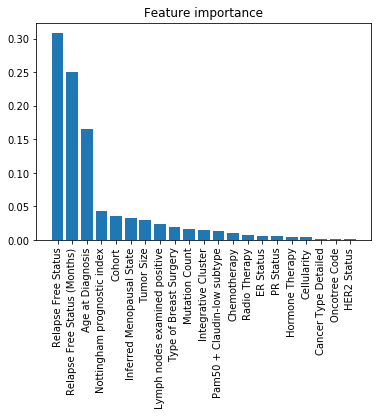

In [74]:
importance=RFC2.feature_importances_
indice=importance.argsort()[::-1]
feature_names=X.columns[indice]

plt.figure()
plt.title('Feature importance')
plt.bar(range(X.shape[1]),importance[indice])

plt.xticks(range(X.shape[1]), feature_names,rotation=90)

plt.show()

# Checking for changes in accuracy in naive bayes with the most important features

In [75]:
X_selected= datafinal_rc.drop(['Overall Survival Status','Cellularity','PR Status','Inferred Menopausal State','Type of Breast Surgery','Cancer Type Detailed','Oncotree Code','Hormone Therapy','Radio Therapy','Chemotherapy','ER Status','HER2 Status'], axis=1)

y_selected = datafinal_rc['Overall Survival Status']

In [76]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, y_selected, test_size = 0.2, random_state = 0)

In [77]:
gnb.fit(X_train_selected, y_train_selected)
y_pred_selected1 = gnb.predict(X_test_selected)
accuracy_score(y_test_selected, y_pred_selected1)


0.7556179775280899

In [78]:
y_pred_train_selected = gnb.predict(X_train_selected)
accuracy_score(y_train_selected, y_pred_train_selected)

0.7746478873239436

In [79]:
# After feature importance i wanted to see if there was going to be a better accuracy score with respect to naive bayes classifer
# The results was basically identical 

## From the above, I believe the best algorithm is the Random Forest algorithm, looking at the accuracy, the precision, recall and F1-score. 